In [1]:
#ProjectLink
##https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv("D:\\Downloads\\kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#EDA
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
#Checking for Duplicates
print(data.duplicated().sum())

0


<Axes: >

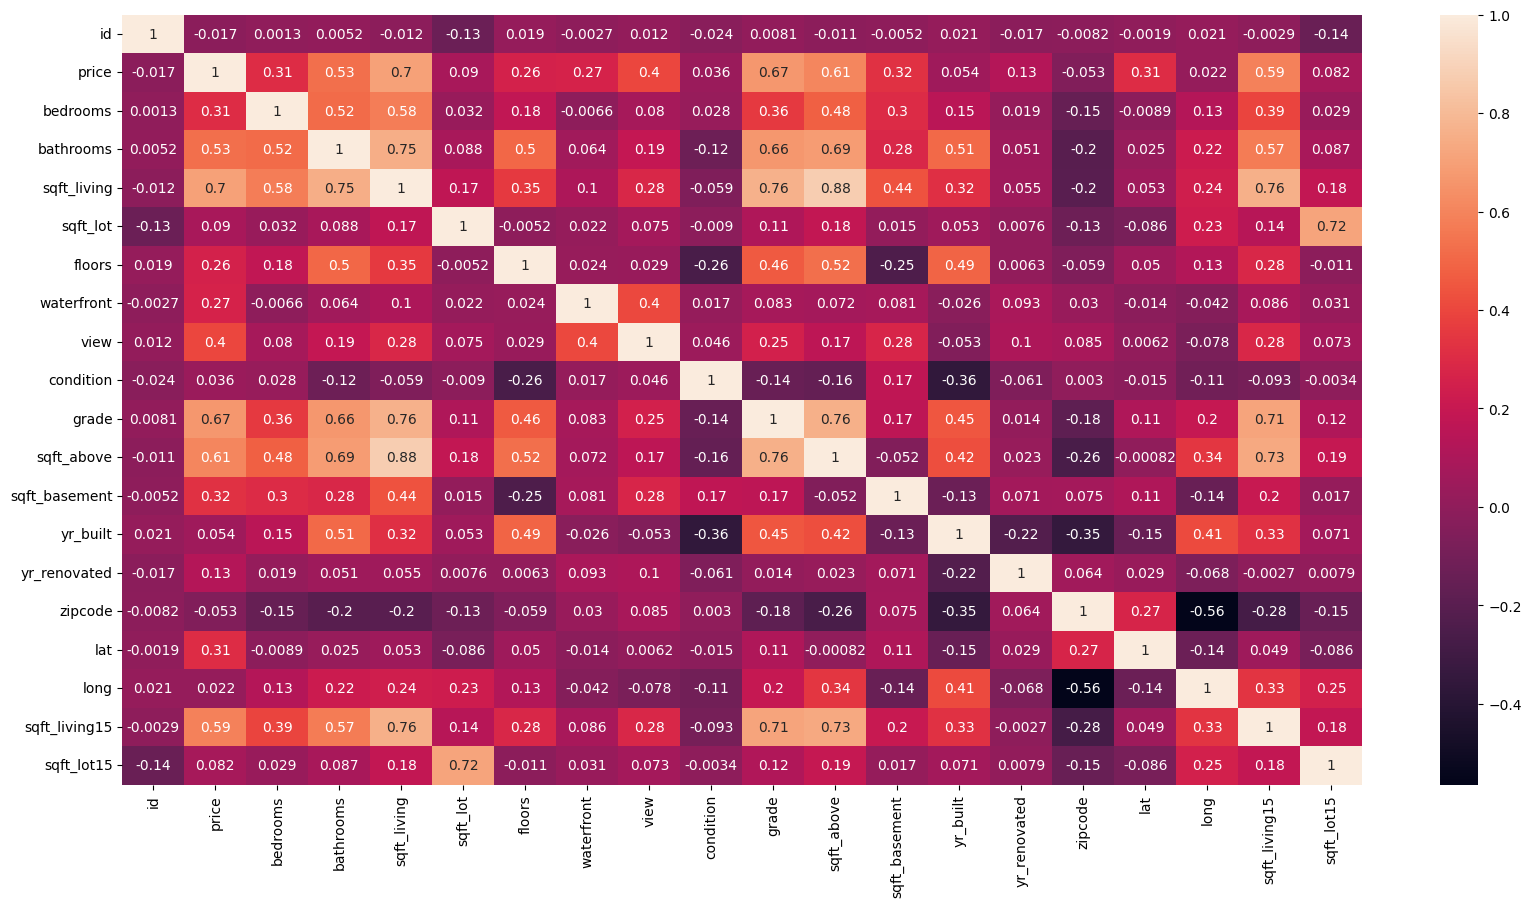

In [6]:
data1 = data.select_dtypes(include = ['int', 'float'])
plt.figure(figsize = (20,10))
sb.heatmap(data1.corr(), annot=True)


In [7]:
'''columns that are correlated with price are 
1.sqft_living15
2.lat
3.sqft_basement
4.sqft_above
5.grade
6.view
7.floors
8.sqft_living
9.bathrooms
10.bedrooms
'''

'columns that are correlated with price are \n1.sqft_living15\n2.lat\n3.sqft_basement\n4.sqft_above\n5.grade\n6.view\n7.floors\n8.sqft_living\n9.bathrooms\n10.bedrooms\n'

<Axes: >

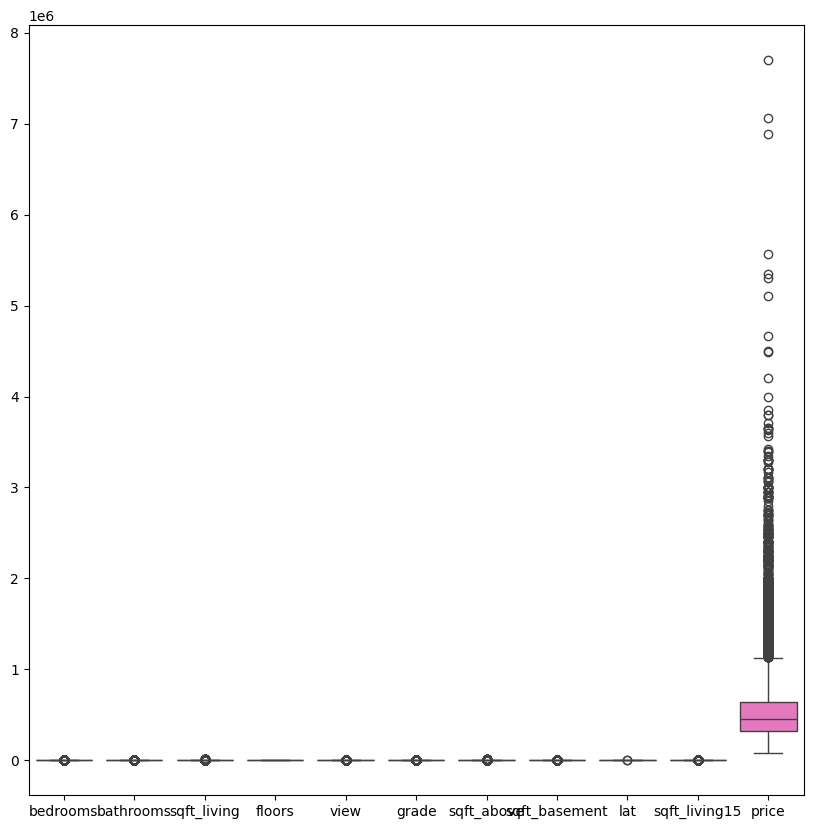

In [8]:
cols = ['bedrooms', 'bathrooms', 'sqft_living', 'floors','view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15', 'price']
plt.figure(figsize = (10,10))
sb.boxplot(data[cols])

In [9]:
#Normalizing data using minmax scaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(data[cols])
data_norm = pd.DataFrame(scaled_values, columns=cols, index=data.index)
print(data[cols].describe())
print(data_norm.describe())

           bedrooms     bathrooms   sqft_living        floors          view  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       3.370842      2.114757   2079.899736      1.494309      0.234303   
std        0.930062      0.770163    918.440897      0.539989      0.766318   
min        0.000000      0.000000    290.000000      1.000000      0.000000   
25%        3.000000      1.750000   1427.000000      1.000000      0.000000   
50%        3.000000      2.250000   1910.000000      1.500000      0.000000   
75%        4.000000      2.500000   2550.000000      2.000000      0.000000   
max       33.000000      8.000000  13540.000000      3.500000      4.000000   

              grade    sqft_above  sqft_basement           lat  sqft_living15  \
count  21613.000000  21613.000000   21613.000000  21613.000000   21613.000000   
mean       7.656873   1788.390691     291.509045     47.560053    1986.552492   
std        1.175459    828.090978     442.575

<Axes: >

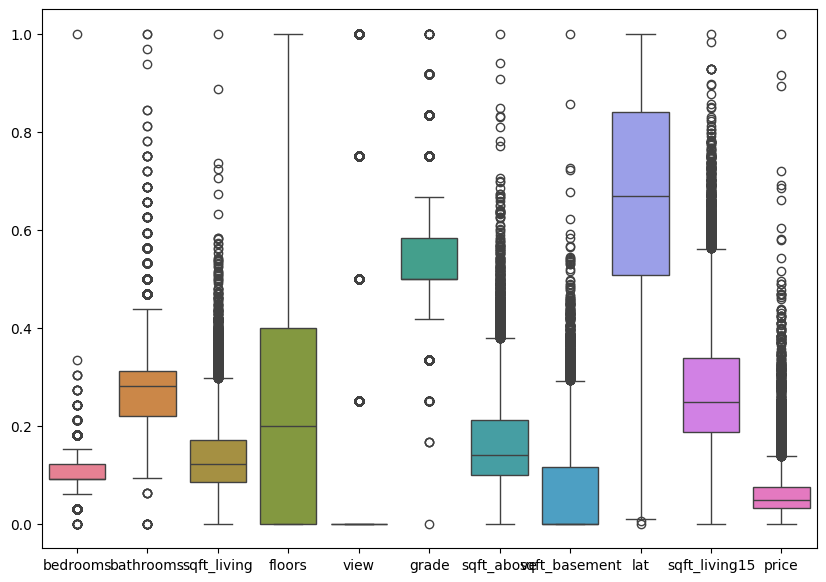

In [10]:
plt.figure(figsize = (10,7))
sb.boxplot(data_norm)

In [11]:
#Handling outliers in all columns using IQR method
q1 = data_norm[cols].quantile(0.25)
q3 = data_norm[cols].quantile(0.75) 
iqr = q3 - q1
lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr 
condition = ~((data_norm[cols] < (lb)) | (data_norm[cols] > (ub))).any(axis=1)
data_norm = data_norm[condition]

<Axes: >

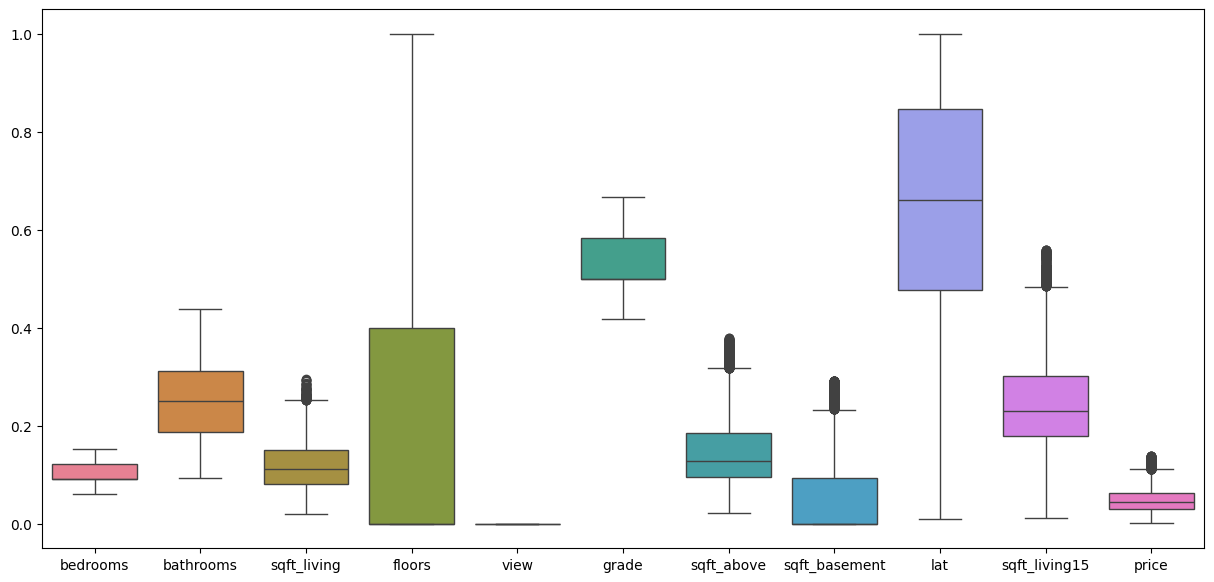

In [12]:
plt.figure(figsize = (15,7))
sb.boxplot(data_norm)

<Axes: >

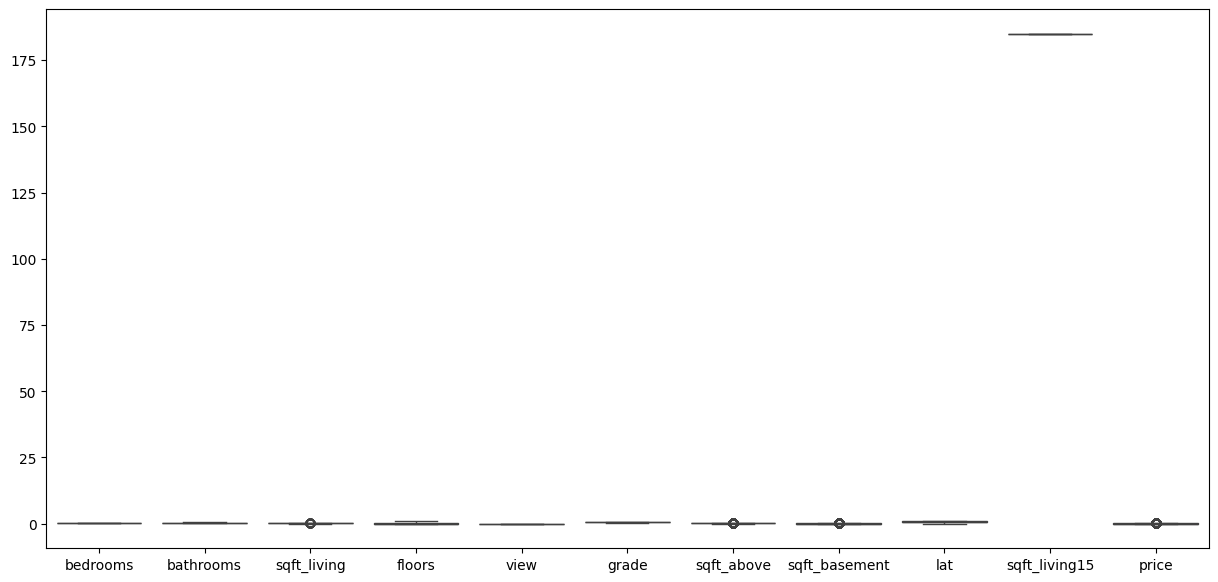

In [13]:
#Handling Outliers in leftover columns
treatcols = ['sqft_living', 'sqft_above', 'sqft_basement', 'sqft_living15', 'price']
for col in treatcols:
    q1 = np.percentile(data[col], 25)
    q3 = np.percentile(data[col], 75)
    iqr = q3 - q1
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    data_norm[col] = data_norm[col].clip(lower=lb, upper=ub)
plt.figure(figsize=(15,7))
sb.boxplot(data_norm)

In [14]:
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17160 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       17160 non-null  float64
 1   bathrooms      17160 non-null  float64
 2   sqft_living    17160 non-null  float64
 3   floors         17160 non-null  float64
 4   view           17160 non-null  float64
 5   grade          17160 non-null  float64
 6   sqft_above     17160 non-null  float64
 7   sqft_basement  17160 non-null  float64
 8   lat            17160 non-null  float64
 9   sqft_living15  17160 non-null  float64
 10  price          17160 non-null  float64
dtypes: float64(11)
memory usage: 1.6 MB


In [15]:
# Splitting Data for Train And Test
x = data_norm.drop(['price'], axis=1)
y = data_norm['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [16]:
#Multiple Linear Regression model training
lmodel = LinearRegression()
lmodel.fit(x_train, y_train)

LinearRegression()

In [17]:
#Predict Using Multiple Linear Regression
lpred = lmodel.predict(x_test)

In [18]:
#EVALUATING Multiple Linear Regression MODEL
lmse = mean_squared_error(y_test,lpred)
print("Mean_squared_Error: ",lmse)
lmae = mean_absolute_error(y_test,lpred)
print("Mean_Absolute_error: ",lmae)
lrmse  = np.sqrt(lmse)
print("Root_Mean_Square_Error: ",lrmse)
lscore = r2_score(y_test,lpred)
print("R2_Score: ",lscore)

Mean_squared_Error:  0.0002559293898646446
Mean_Absolute_error:  0.011965602673521194
Root_Mean_Square_Error:  0.015997793281094883
R2_Score:  0.55838130496813


In [19]:
#Using Polynomial Regression
poly = PolynomialFeatures(degree = 5)
x_trainpoly = poly.fit_transform(x_train)
x_testpoly = poly.transform(x_test)
pr = LinearRegression()
pr.fit(x_trainpoly, y_train)

LinearRegression()

In [20]:
#Predict Using Polynomial Regression
ppred = pr.predict(x_testpoly)

In [21]:
#EVALUATING Polynomial Regression MODEL
pmse = mean_squared_error(y_test,ppred)
print("Mean_squared_Error: ",pmse)
pmae = mean_absolute_error(y_test,ppred)
print("Mean_Absolute_error: ",pmae)
prmse  = np.sqrt(pmse)
print("Root_Mean_Square_Error: ",prmse)
pscore = r2_score(y_test,ppred)
print("R2_Score: ",pscore)

Mean_squared_Error:  0.00015389542949402731
Mean_Absolute_error:  0.008851345161855706
Root_Mean_Square_Error:  0.012405459664761613
R2_Score:  0.7344459001740062


In [22]:
#Creating Clusters
k = 4
km = KMeans(n_clusters = k, random_state = 0)
km.fit(data_norm)
data_norm['Price Class'] = km.labels_
print(data_norm)

       bedrooms  bathrooms  sqft_living  floors  view     grade  sqft_above  \
0      0.090909    0.12500     0.067170     0.0   0.0  0.500000    0.097588   
1      0.090909    0.28125     0.172075     0.4   0.0  0.500000    0.206140   
2      0.060606    0.12500     0.036226     0.0   0.0  0.416667    0.052632   
3      0.121212    0.37500     0.126038     0.0   0.0  0.500000    0.083333   
4      0.090909    0.25000     0.104906     0.0   0.0  0.583333    0.152412   
...         ...        ...          ...     ...   ...       ...         ...   
21608  0.090909    0.31250     0.093585     0.8   0.0  0.583333    0.135965   
21609  0.121212    0.31250     0.152453     0.4   0.0  0.583333    0.221491   
21610  0.060606    0.09375     0.055094     0.4   0.0  0.500000    0.080044   
21611  0.090909    0.31250     0.098868     0.4   0.0  0.583333    0.143640   
21612  0.060606    0.09375     0.055094     0.4   0.0  0.500000    0.080044   

       sqft_basement       lat  sqft_living15     p

In [23]:
#Splitting DataSet
xc = data_norm.drop(['Price Class'], axis = 1)
yc = data_norm['Price Class']
xc_train, xc_test, yc_train, yc_test = train_test_split(xc, yc, test_size = 0.3, random_state = 131)

In [24]:
#Train Logistic Regression model
logisticmodel = LogisticRegression(max_iter = 20000)
logisticmodel.fit(xc_train, yc_train)

LogisticRegression(max_iter=20000)

In [25]:
#Predict using logistic model
logpred = logisticmodel.predict(xc_test)

In [26]:
#Evaluation of model
print("Accuracy Score: ",accuracy_score(yc_test, logpred) * 100)
print("Classification Report: ",classification_report(yc_test, logpred))
print("Confusion Matrix: ",confusion_matrix(yc_test, logpred))

Accuracy Score:  98.81507381507382
Classification Report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99      1738
           1       0.99      0.99      0.99      1339
           2       1.00      0.97      0.98       721
           3       0.98      0.99      0.98      1350

    accuracy                           0.99      5148
   macro avg       0.99      0.99      0.99      5148
weighted avg       0.99      0.99      0.99      5148

Confusion Matrix:  [[1721    0    0   17]
 [   7 1332    0    0]
 [   0   13  697   11]
 [  13    0    0 1337]]


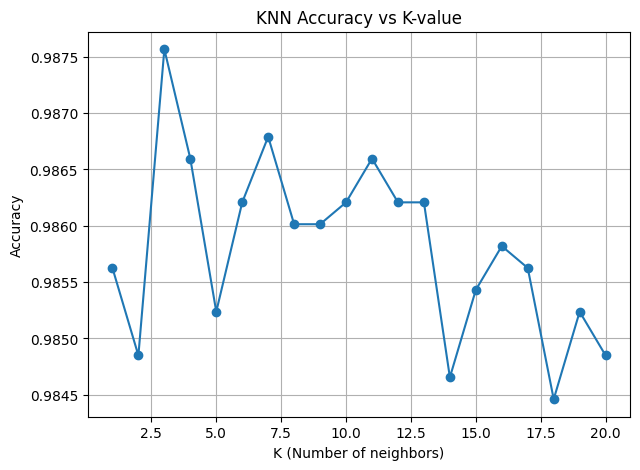

In [27]:
#Finding best K value for KNN model
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knnmodel = KNeighborsClassifier(n_neighbors=k)
    knnmodel.fit(xc_train, yc_train)
    accuracies.append(accuracy_score(knnmodel.predict(xc_test), yc_test))

# Plot
plt.figure(figsize=(7,5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K (Number of neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K-value")
plt.grid(True)
plt.show()

In [28]:
#Train KNN model
kval = 3
knn = KNeighborsClassifier(n_neighbors=kval)
knn.fit(xc_train, yc_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
#Predict Using KNN Model
knnpred = knn.predict(xc_test)

In [30]:
#Evaluation of model
print("Accuracy Score: ",accuracy_score(yc_test, knnpred) * 100)
print("Classification Report: ",classification_report(yc_test, knnpred))
print("Confusion Matrix: ",confusion_matrix(yc_test, knnpred))

Accuracy Score:  98.75679875679876
Classification Report:                precision    recall  f1-score   support

           0       0.98      0.99      0.99      1738
           1       0.99      0.99      0.99      1339
           2       0.98      0.99      0.99       721
           3       0.99      0.98      0.98      1350

    accuracy                           0.99      5148
   macro avg       0.99      0.99      0.99      5148
weighted avg       0.99      0.99      0.99      5148

Confusion Matrix:  [[1722    2    0   14]
 [   3 1325   11    0]
 [   0    6  711    4]
 [  24    0    0 1326]]


In [31]:
#Train Naive Bayes Model
NBmodel = GaussianNB()
NBmodel.fit(xc_train, yc_train)

GaussianNB()

In [32]:
#Predict Using NaiveBayes Model
NBpred = NBmodel.predict(xc_test)

In [33]:
#Evaluation of model
print("Accuracy Score: ",accuracy_score(yc_test, NBpred) * 100)
print("Classification Report: ",classification_report(yc_test, NBpred))
print("Confusion Matrix: ",confusion_matrix(yc_test, NBpred))

Accuracy Score:  92.83216783216784
Classification Report:                precision    recall  f1-score   support

           0       0.96      0.92      0.94      1738
           1       0.91      0.93      0.92      1339
           2       0.87      0.92      0.90       721
           3       0.94      0.94      0.94      1350

    accuracy                           0.93      5148
   macro avg       0.92      0.93      0.92      5148
weighted avg       0.93      0.93      0.93      5148

Confusion Matrix:  [[1606   67    0   65]
 [   0 1242   97    0]
 [   0   45  665   11]
 [  66   18    0 1266]]


In [35]:
#Train Decision Tree Model
treemodel = DecisionTreeClassifier()
treemodel.fit(xc_train, yc_train)

DecisionTreeClassifier()

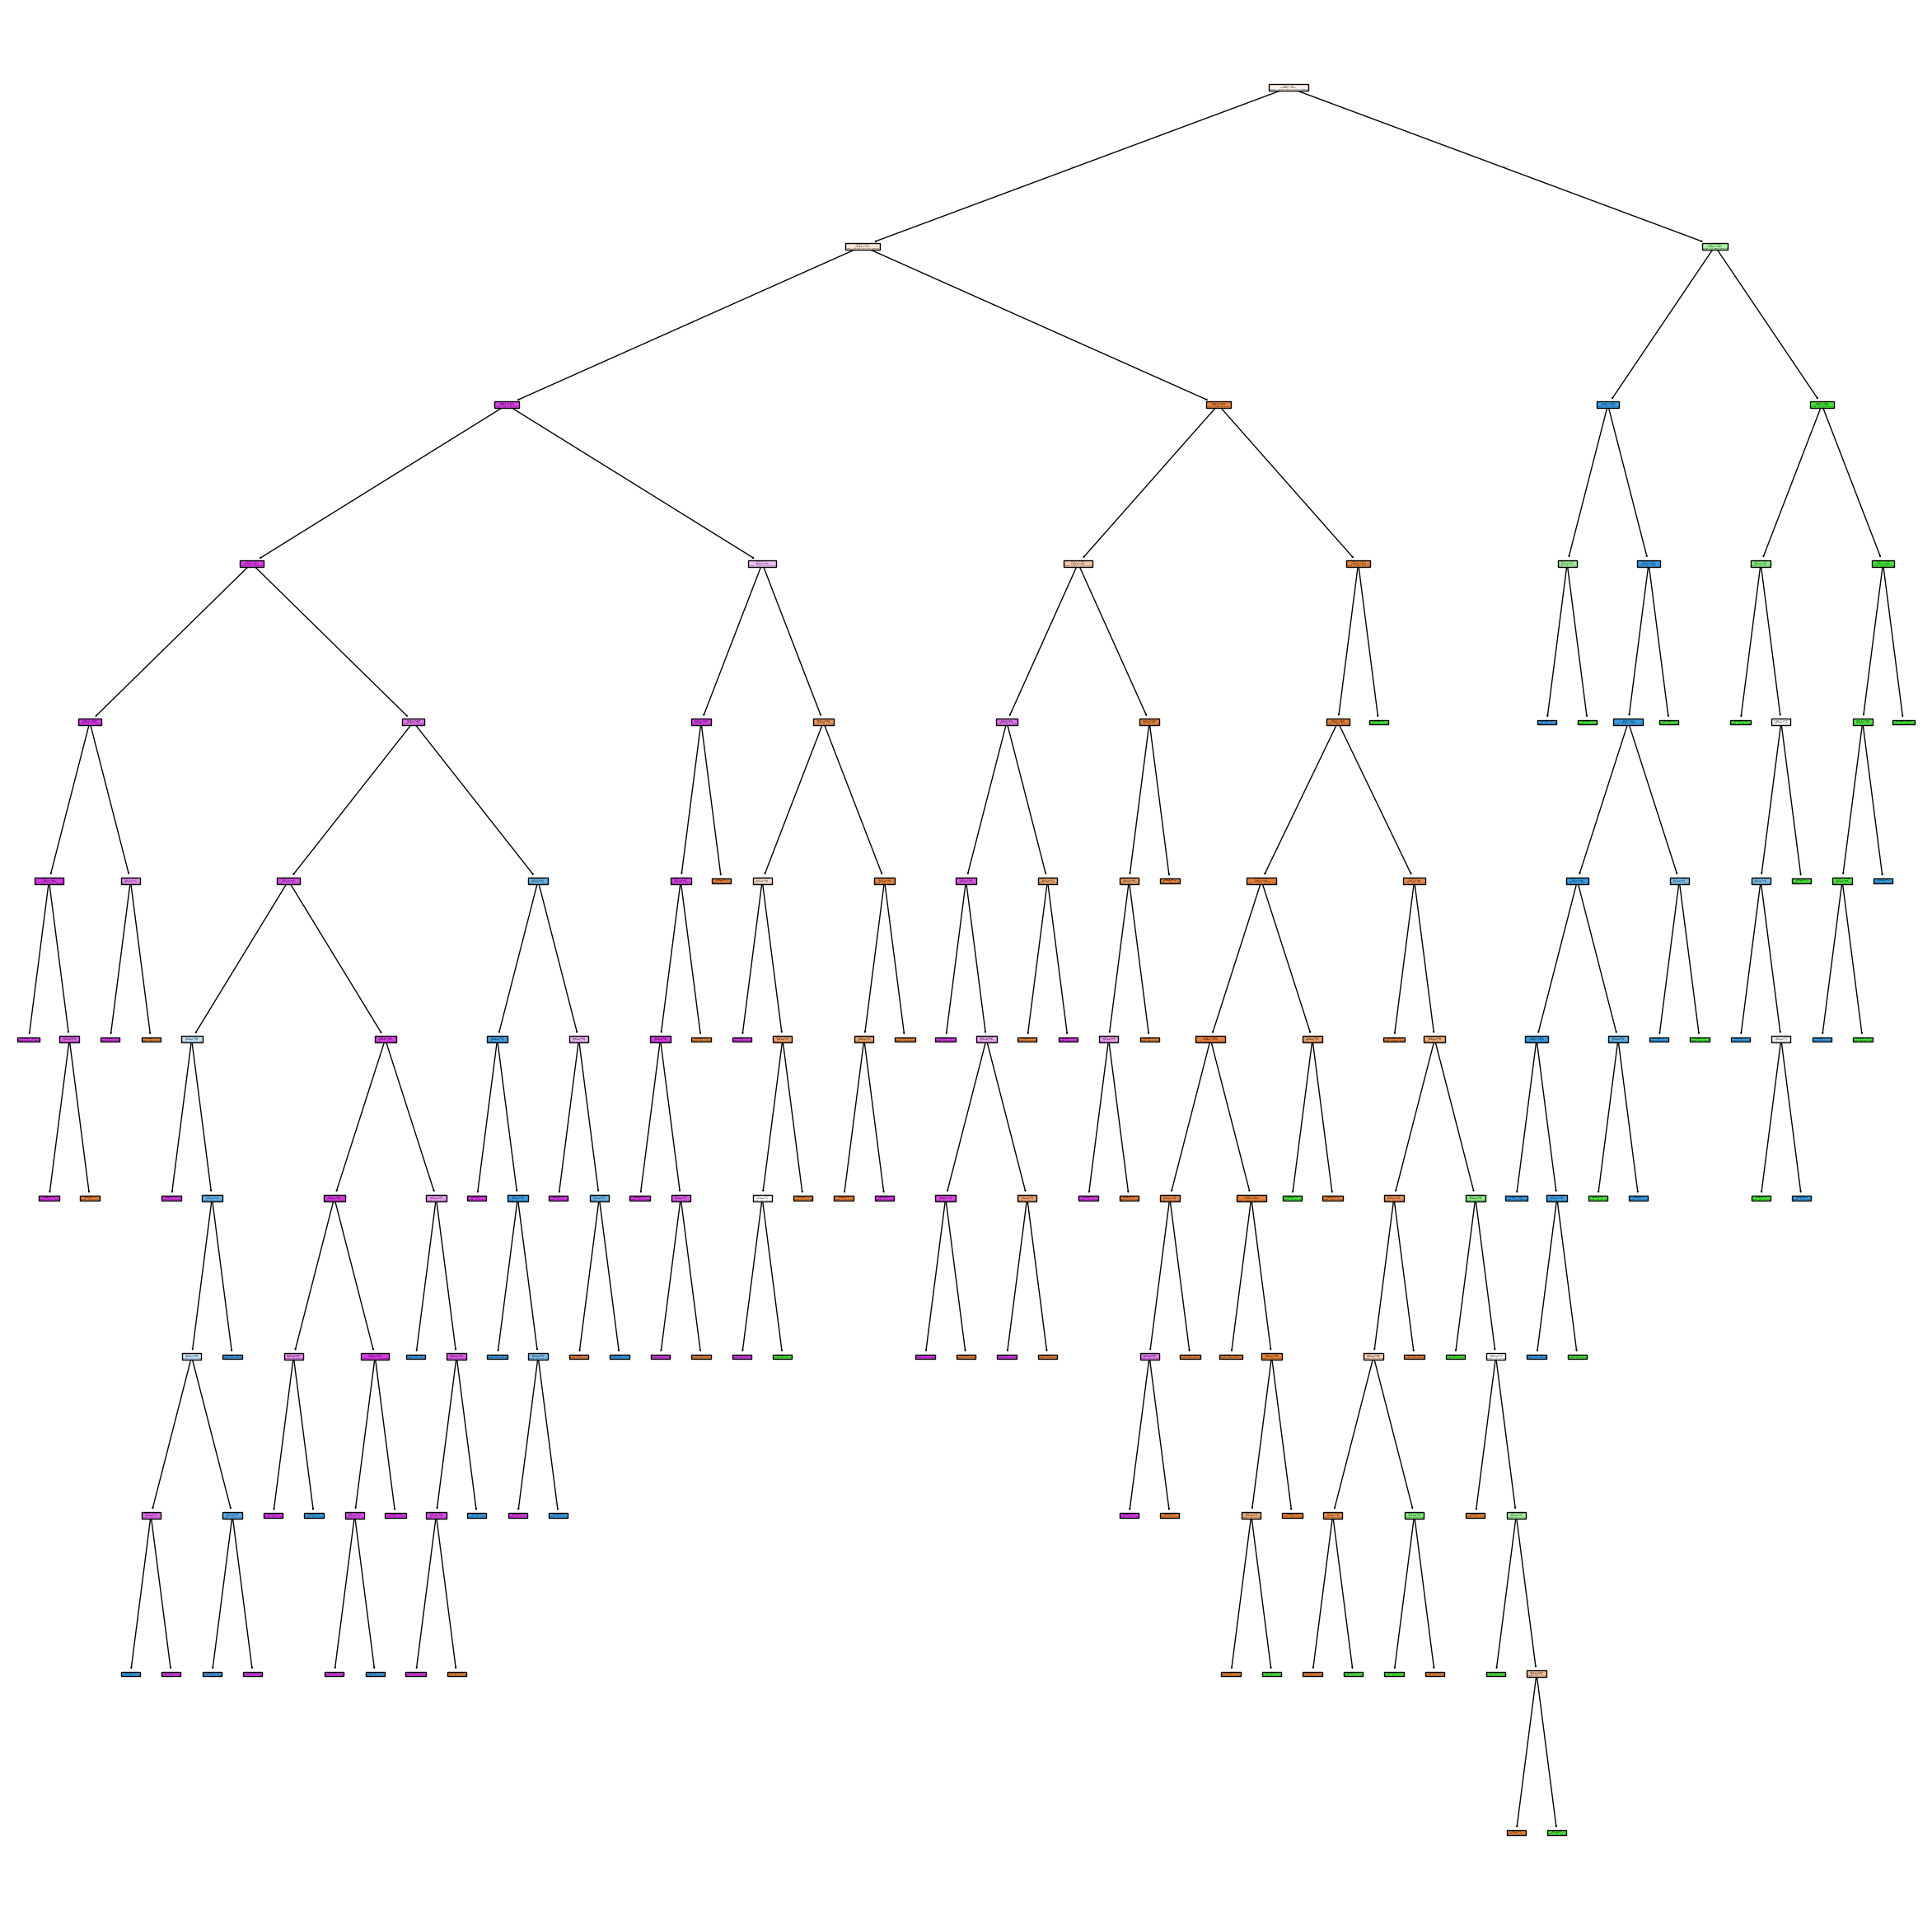

In [38]:
#Plot Tree
plt.figure(figsize = (30,30))
plot_tree(treemodel, filled = True)
plt.show()

In [39]:
#Predict Using Decision Tree
treepred = treemodel.predict(xc_test)

In [40]:
#Evaluation of tree model
print("\nConfusion Matrix:\n", confusion_matrix(yc_test, treepred))
print(f"\nAccuracy: {accuracy_score(yc_test, treepred) * 100:.2f}%")
print("\n Classification Report: ",classification_report(yc_test, treepred))


Confusion Matrix:
 [[1732    1    0    5]
 [   4 1332    3    0]
 [   2    4  709    6]
 [  15    1    2 1332]]

Accuracy: 99.16%

 Classification Report:                precision    recall  f1-score   support

           0       0.99      1.00      0.99      1738
           1       1.00      0.99      1.00      1339
           2       0.99      0.98      0.99       721
           3       0.99      0.99      0.99      1350

    accuracy                           0.99      5148
   macro avg       0.99      0.99      0.99      5148
weighted avg       0.99      0.99      0.99      5148



In [41]:
#Training SVM model
svmmodel = SVC(kernel = 'linear')
svmmodel.fit(xc_train,yc_train)

SVC(kernel='linear')

In [45]:
#Predict Using SVM model
svmpred = svmmodel.predict(xc_test)

In [46]:
#Evaluation of SVM model
print("\nConfusion Matrix:\n", confusion_matrix(yc_test, svmpred))
print(f"\nAccuracy: {accuracy_score(yc_test, svmpred) * 100:.2f}%")
print("\n Classification Report: ",classification_report(yc_test, svmpred))


Confusion Matrix:
 [[1721    0    0   17]
 [   7 1331    1    0]
 [   0   12  698   11]
 [  12    0    0 1338]]

Accuracy: 98.83%

 Classification Report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99      1738
           1       0.99      0.99      0.99      1339
           2       1.00      0.97      0.98       721
           3       0.98      0.99      0.99      1350

    accuracy                           0.99      5148
   macro avg       0.99      0.99      0.99      5148
weighted avg       0.99      0.99      0.99      5148

